In [ ]:
import os
import tarfile
import shutil
import dask
import requests
import time
import psutil

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from astrohack import holog
from astrohack.dio import extract_holog
from astrohack.dio import _load_holog_file
from astrohack._utils._io import _make_ant_pnt_dict

from dask.distributed import Client, LocalCluster

In [ ]:
DA = [
    'DA41', 'DA42', 'DA43', 
    'DA44', 'DA45', 'DA46', 
    'DA48', 'DA49', 'DA50', 
    'DA51', 'DA52', 'DA53', 
    'DA54', 'DA55', 'DA56', 
    'DA57', 'DA58', 'DA59'
]
DV = [
    'DV02', 'DV03', 'DV04', 
    'DV11', 'DV12', 'DV13', 
    'DV14', 'DV15', 'DV16', 
    'DV17', 'DV18', 'DV19', 
    'DV20', 'DV21', 'DV22', 
    'DV23', 'DV24', 'DV25'
] 


holog_obs_description = {0:{2:{'map':DV,'ref':DA}, 6:{'map':DV,'ref':DA}, 10:{'map':DV,'ref':DA},4:{'map':DA,'ref':DV}, 8:{'map':DA,'ref':DV}, 12:{'map':DA,'ref':DV}}} 


extract_holog(
    ms_name='J1924-2914.ms.split.calibrated.SPW3', 
    holog_name='J1924-2914.SPW3.holog.zarr', 
    holog_obs_dict=holog_obs_description,
    data_col='DATA',
    subscan_intent='MIXED',
    parallel=False,
    overwrite=True
)

In [1]:
import os
import tarfile
import shutil
import dask
import requests
import time
import psutil

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from astrohack import holog
from astrohack.dio import extract_holog
from astrohack.dio import _load_holog_file
from astrohack._utils._io import _make_ant_pnt_dict

from dask.distributed import Client, LocalCluster

In [2]:
cell_size = np.array([5.26298868e-05, 5.26298868e-05])
grid_size = np.array([49, 49])
grid_interpolation_mode = 'linear' #'nearest' 'linear' 'cubic'
chan_average = True
chan_tolerance_factor = 0.005
reference_scaling_frequency = None #In Hz
#spw_average if True users has to give reference_scaling_frequency
scan_average = True
holog(holog_file='J1924-2914.SPW3.holog.zarr', padding_factor=50, 
      parallel=False, cell_size=cell_size, 
      grid_size=grid_size, grid_interpolation_mode=grid_interpolation_mode,
      chan_average = chan_average, chan_tolerance_factor = chan_tolerance_factor,
      reference_scaling_frequency=reference_scaling_frequency,
      scan_average = scan_average,
      ant_list = ['3']
     )

[2023-02-02 11:00:08.402162 System Info]: Loading holography file J1924-2914.SPW3.holog.zarr ...
beam grid shape (1, 1, 4, 49, 49)
[2023-02-02 11:00:10.776607 System Info]: [_holog_chunk] FFT padding factor 50
[2023-02-02 11:00:10.776654 System Info]: Calculating aperture illumination pattern ...
grid.shape (1, 1, 4, 49, 49) 823


In [3]:
def _open_holog(hack_file, ddi):   
    ant_grid_data = {}
    
    ant_list =  [dir_name for dir_name in os.listdir(hack_file) if os.path.isdir(hack_file)]
    for ant in ant_list:
        ant_grid_data[int(ant)] = xr.open_zarr("{name}/{ant}/{ddi}".format(name=hack_file, ant=ant, ddi=ddi) )
        
    return ant_grid_data

img_mds = _open_holog('J1924-2914.SPW3.image.zarr', ddi=0)

In [4]:
img_mds.keys()

dict_keys([3])

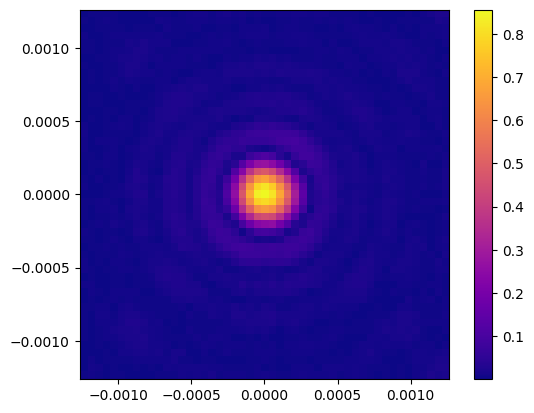

In [5]:
import matplotlib.pyplot as plt
import numpy as np
ant_id = 3

grid = img_mds[ant_id].BEAM.values.mean(axis=0)[0, 0, ...]
l = img_mds[ant_id].l.values
m = img_mds[ant_id].m.values

fig, ax = plt.subplots()

beam = plt.imshow(np.abs(grid), extent=[l.min(), l.max(), m.min(), m.max()], cmap='plasma')
fig.colorbar(beam, ax=ax)

In [6]:
img_mds[ant_id]

<xarray.Dataset>
Dimensions:        (time-centroid: 1, chan: 1, pol: 4, u: 1695, v: 1695, l: 49,
                    m: 49, ddi: 1, time_centroid: 3)
Coordinates:
  * chan           (chan) float64 1.1e+11
  * ddi            (ddi) int64 0
  * l              (l) float64 -0.001263 -0.00121 -0.001158 ... 0.00121 0.001263
  * m              (m) float64 -0.001263 -0.00121 -0.001158 ... 0.00121 0.001263
  * pol            (pol) int64 0 1 2 3
  * time_centroid  (time_centroid) float64 5.045e+09 5.045e+09 5.045e+09
  * u              (u) float64 -9.495e+03 -9.483e+03 ... 9.483e+03 9.495e+03
  * v              (v) float64 -9.495e+03 -9.483e+03 ... 9.483e+03 9.495e+03
Dimensions without coordinates: time-centroid
Data variables:
    APERTURE       (time-centroid, chan, pol, u, v) complex128 dask.array<chunksize=(1, 1, 1, 212, 424), meta=np.ndarray>
    BEAM           (time-centroid, chan, pol, l, m) complex128 dask.array<chunksize=(1, 1, 4, 49, 49), meta=np.ndarray>
Attributes:
    ant_id:         3
    time_centroid:  [5045409362.448, 5045403626.352, 5045415204.624001]

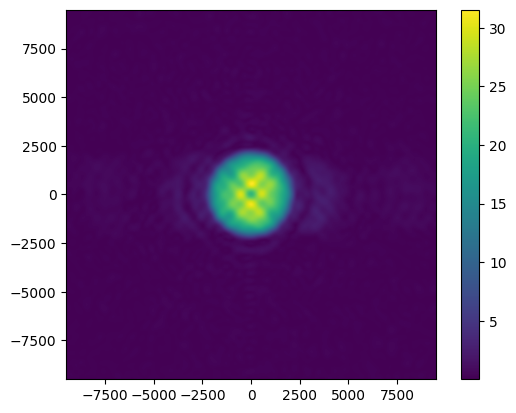

In [7]:
aperture = img_mds[ant_id].APERTURE.values.mean(axis=0)[0, 0, ...]
u = img_mds[ant_id].u.values
v = img_mds[ant_id].v.values

fig, ax = plt.subplots()

image = plt.imshow(np.abs(aperture), extent=[u.min(), u.max(), v.min(), v.max()])
fig.colorbar(image, ax=ax)

#circle = patches.Circle((0,0), 6, fill=False, color='white', alpha=0.7, linewidth=1.2)
#ax.add_patch(circle)